In [ ]:
pip install pandas numpy tensorflow scikit-learn matplotlib --user


In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input

from tensorflow.keras.callbacks import LearningRateScheduler
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score


 Bring a dataset relevant to the project idea domain

In [2]:
df = pd.read_csv('Water_Consumption_Prediction.csv')


In [3]:
df.head()


,Date,Household_ID,Number_of_Residents,Average_Temperature,Rainfall(mm),Season,Day_of_week,Income_Level,Is_Meter_Functioning,Building_Area(sq_meters),Water_Saving_Tips_Adopted,WaterConsumption(Liters)
0,2022-01-01,H5494,9,38.185856,5.504344,Winter,Monday,Low,False,158.743045,0,426.634889
1,2022-01-02,H1942,1,12.687502,14.359086,Summer,Saturday,High,False,495.135067,1,104.246279
2,2022-01-03,H1769,4,38.721056,NaN,Winter,Thursday,Medium,True,305.847352,1,142.489249
3,2022-01-04,H8934,5,29.637771,19.047242,Winter,Sunday,Medium,False,332.708919,3,212.498736
4,2022-01-05,H5670,4,NaN,0.123794,Autumn,Saturday,Low,True,163.769148,0,246.746020


 Perform data preprocessing on the dataset

In [7]:
# Step 1: Fill missing values in 'Average_Temperature' and 'Rainfall(mm)' with their respective means
df['Average_Temperature'] = df['Average_Temperature'].fillna(df['Average_Temperature'].mean())
df['Rainfall(mm)'] = df['Rainfall(mm)'].fillna(df['Rainfall(mm)'].mean())

In [9]:
df.head()


,Date,Household_ID,Number_of_Residents,Average_Temperature,Rainfall(mm),Season,Day_of_week,Income_Level,Is_Meter_Functioning,Building_Area(sq_meters),Water_Saving_Tips_Adopted,WaterConsumption(Liters)
0,2022-01-01,H5494,9,38.185856,5.504344,Winter,Monday,Low,False,158.743045,0,426.634889
1,2022-01-02,H1942,1,12.687502,14.359086,Summer,Saturday,High,False,495.135067,1,104.246279
2,2022-01-03,H1769,4,38.721056,9.962345,Winter,Thursday,Medium,True,305.847352,1,142.489249
3,2022-01-04,H8934,5,29.637771,19.047242,Winter,Sunday,Medium,False,332.708919,3,212.498736
4,2022-01-05,H5670,4,22.503904,0.123794,Autumn,Saturday,Low,True,163.769148,0,246.746020


In [11]:
# Explicitly define the categories for one-hot encoding
season_categories = ['Winter', 'Summer', 'Spring', 'Autumn']

# Ensure all categories are included during encoding
df['Season'] = pd.Categorical(df['Season'], categories=season_categories)
df = pd.get_dummies(df, columns=['Season'], prefix='Season')
                                                                                                    
# to convert True and False into 1 and 0 in season 
df[df.filter(like='Season').columns] = df.filter(like='Season').apply(lambda x: x.astype(int))
# to convert True and False into 1 and 0  in Is_Meter_Functioning
df[df.filter(like='Is_Meter_Functioning').columns] = df.filter(like='Is_Meter_Functioning').apply(lambda x: x.astype(int))


In [13]:
Day_of_week_categories = ['Saturday','Sunday', 'Monday', 'Tuesday' , 'Wednesday' , 'Thursday' , 'Friday']

# Ensure all categories are included during encoding
df['Day_of_week'] = pd.Categorical(df['Day_of_week'], categories=Day_of_week_categories)
df = pd.get_dummies(df, columns=['Day_of_week'], prefix='Day_of_week')
df[df.filter(like='Day_of_week').columns] = df.filter(like='Day_of_week').apply(lambda x: x.astype(int))

In [15]:
Income_Level_categories = ['Low', 'High', 'Medium']

# Ensure all categories are included during encoding
df['Income_Level'] = pd.Categorical(df['Income_Level'], categories=Income_Level_categories)
df = pd.get_dummies(df, columns=['Income_Level'], prefix='Income_Level')
df[df.filter(like='Income_Level').columns] = df.filter(like='Income_Level').apply(lambda x: x.astype(int))


In [17]:
df.head()

,Date,Household_ID,Number_of_Residents,Average_Temperature,Rainfall(mm),Is_Meter_Functioning,Building_Area(sq_meters),Water_Saving_Tips_Adopted,WaterConsumption(Liters),Season_Winter,...,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Monday,Day_of_week_Tuesday,Day_of_week_Wednesday,Day_of_week_Thursday,Day_of_week_Friday,Income_Level_Low,Income_Level_High,Income_Level_Medium
0,2022-01-01,H5494,9,38.185856,5.504344,0,158.743045,0,426.634889,1,...,0,0,1,0,0,0,0,1,0,0
1,2022-01-02,H1942,1,12.687502,14.359086,0,495.135067,1,104.246279,0,...,1,0,0,0,0,0,0,0,1,0
2,2022-01-03,H1769,4,38.721056,9.962345,1,305.847352,1,142.489249,1,...,0,0,0,0,0,1,0,0,0,1
3,2022-01-04,H8934,5,29.637771,19.047242,0,332.708919,3,212.498736,1,...,0,1,0,0,0,0,0,0,0,1
4,2022-01-05,H5670,4,22.503904,0.123794,1,163.769148,0,246.746020,0,...,1,0,0,0,0,0,0,1,0,0


In [ ]:
df.head()

In [19]:
# Drop unnecessary columns
df.drop(columns=['Date', 'Household_ID'], inplace=True)

In [21]:
df.to_csv('processed_dataset.csv', index=False)

 Train your neural network model

In [23]:
# Separate input features (X) and target (y)
X = df.drop(columns=['WaterConsumption(Liters)'])
y = df['WaterConsumption(Liters)']

In [25]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

3. Deal with Learning rate schedules using callbacks

In [29]:
# Define the learning rate schedule function
def lr_schedule(epoch, lr):
    """Learning rate schedule: reduces the learning rate after every 10 epochs."""
    if epoch % 10 == 0 and epoch != 0:
        lr = lr * 0.9  # Reduce learning rate by 10% every 10 epochs
    return lr

In [31]:
# Define the neural network model



model = Sequential([
    Input(shape=(X_train.shape[1],)),  # Specify input shape here
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')  # Output layer for regression
])

In [33]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [35]:
lr_scheduler = LearningRateScheduler(lr_schedule)

In [37]:
# Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=1, callbacks=[lr_scheduler])

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 112892.2266 - mae: 288.1035 - val_loss: 106917.1562 - val_mae: 274.8055 - learning_rate: 0.0010
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 99569.3281 - mae: 264.2652 - val_loss: 59166.1914 - val_mae: 194.6310 - learning_rate: 0.0010
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 41153.8359 - mae: 161.6108 - val_loss: 10883.6475 - val_mae: 85.4179 - learning_rate: 0.0010
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7166.9727 - mae: 68.0658 - val_loss: 3977.1104 - val_mae: 48.4601 - learning_rate: 0.0010
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3030.5049 - mae: 40.8025 - val_loss: 2384.2151 - val_mae: 35.5004 - learning_rate: 0.0010
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1775.0233 - mae: 30.2107 - val_loss: 1642.8832 - val_mae: 29.2544 - learning_rate: 0.0010
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1273.2456 - mae: 25.5663 - 

 Evaluate your model on testing dataset (Classification or Regression)

In [39]:
# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}, Test MAE: {test_mae:.4f}")

Test Loss: 106.7763, Test MAE: 7.9037


 Use the model to make predictions on unseen examples

In [41]:
# Make predictions on the test set (unseen data)
predictions = model.predict(X_test)

r2 = r2_score(y_test, predictions)
#predictions is y_predict

print(f"R-squared: {r2:.4f}")


# Print the first few predictions
print("Predictions on unseen data:", predictions[:5])

# Optionally, you can compare the predictions with actual values (y_test)
import numpy as np
print("Actual values:", y_test[:5].values)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
R-squared: 0.9966
Predictions on unseen data: [[270.8625 ]
 [200.30917]
 [209.42226]
 [117.29158]
 [371.9724 ]]
Actual values: [261.93749802 204.56358184 202.61283455 124.46431794 350.26836241]


In [43]:
#evaluate performance on unseen data using Mean Absolute Error (MAE)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predictions)
print(f"Mean Absolute Error (MAE) on unseen data: {mae:.4f}")

Mean Absolute Error (MAE) on unseen data: 7.9037


 Do Feature Importance on your model

In [45]:
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error

# Define a custom scoring function for the Keras model
def custom_scorer(model, X, y):
    # Predict using the model
    y_pred = model.predict(X)
    # Calculate mean squared error (for regression)
    return -mean_squared_error(y, y_pred)

# Perform permutation importance on the trained model
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1, scoring=custom_scorer)

# Get importance scores
importance_scores = result.importances_mean

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importance_scores
})

# Sort the features based on importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importance
print(feature_importance_df)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
                      Feature    Importance
0         Number_of_Residents  51719.535955
7               Season_Summer   7410.696133
6               Season_Winter   2432.268607
3        Is_Meter_Functioning   1826.528855
5   Water_Saving_Tips_Adopted   1430.425763
10       Day_of_week_Saturday   1362.373346
16         Day_of_week_Friday   1235.527189
8               Season_Spring    585.238651
9               Season_Autumn    513.319549
18          Income_Level_High    383.867115
15       Day_of_week_Thursday    268.363840
12         Day_of_week_Monday    239.659566
11         Day_of_week_Sunday    215.370882
14      Day_of_week_Wednesday    211.679959
13        Day_of_week_Tuesday    203.441571
19        Income_Level_Medium     53.424500
17           Income_Level_Low     52.620368
1         Average_Temperature      0.732334
2                Rainfall(mm)      0.376443
4    Building_Area(sq_meters)     -0.713325


In [ ]:
pip install keras-tuner


In [47]:
#create a model-building function that accepts hyperparameters as arguments.
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam

# Define the model-building function for hyperparameter tuning
def build_model(hp):
    model = Sequential([
        Input(shape=(X_train.shape[1],)),  # Specify input shape here
        Dense(units=hp.Int('units_1', min_value=32, max_value=128, step=32), activation='relu'),  # First layer with tunable units
        Dense(units=hp.Int('units_2', min_value=16, max_value=64, step=16), activation='relu'),  # Second layer with tunable units
        Dense(1, activation='linear')  # Output layer for regression
    ])
    
    # Tune the learning rate for the Adam optimizer
    model.compile(optimizer=Adam(learning_rate=hp.Float('learning_rate', min_value=1e-5, max_value=1e-2, sampling='LOG')),
                  loss='mean_squared_error', 
                  metrics=['mae'])
    
    return model


 Perform hyperparameter tuning and provide an explanation of the new results

In [49]:
# Initialize the tuner
tuner = kt.Hyperband(
    build_model,
    objective='val_loss',  # We're optimizing for validation loss
    max_epochs=10,  # Maximum number of epochs to run for each trial
    factor=3,  # Reduces the number of trials in each iteration by a factor of 3
    directory='my_dir',  # Directory where results will be stored
    project_name='water_consumption_model'  # Project name
)

# Search for the best hyperparameters
tuner.search(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Reloading Tuner from my_dir\water_consumption_model\tuner0.json


In [87]:


from sklearn.metrics import r2_score
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
import numpy as np


# # Load the best model without the optimizer state
# best_model = tuner.get_best_models(num_models=1)[0]

# Get the best hyperparameters
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

# Print the best hyperparameters
print("Best Hyperparameters: ")
print(f"Units in first layer: {best_hyperparameters.get('units_1')}")
print(f"Units in second layer: {best_hyperparameters.get('units_2')}")
print(f"Learning Rate: {best_hyperparameters.get('learning_rate')}")

# Initialize a fresh optimizer
optimizer = Adam(learning_rate=best_hyperparameters.get('learning_rate'))

# Recompile the model with the new optimizer
best_model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# Evaluate the model on the test set
test_loss, test_mae = best_model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss of the best model: {test_loss:.4f}")
print(f"Test MAE of the best model: {test_mae:.4f}")

# Predict values using the best model
y_pred = best_model.predict(X_test)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print(f"R-squared (Accuracy): {r2:.4f}")

# Optionally: Compare predictions with actual values
print("\nComparison of Predictions and Actual Values:")
print("First few predictions: ", np.round(y_pred[:5].flatten(), 4))
print("First few actual values: ", y_test[:5].values)


Best Hyperparameters: 
Units in first layer: 128
Units in second layer: 64
Learning Rate: 0.00587414640335334
Test Loss of the best model: 73.1035
Test MAE of the best model: 6.7309
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
R-squared (Accuracy): 0.9977

Comparison of Predictions and Actual Values:
First few predictions:  [270.4677 210.0337 208.5647 127.3292 360.8112]
First few actual values:  [261.93749802 204.56358184 202.61283455 124.46431794 350.26836241]


In [71]:
from tensorflow.keras.optimizers import Adam

# Example of a custom optimizer
# optimizer = Adam(learning_rate=0.001)  

# # Recompile the model with the custom optimizer
# best_model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# # Evaluate the model
# test_loss, test_mae = best_model.evaluate(X_test, y_test, verbose=0)
# print(f"Test Loss: {test_loss:.4f}, Test MAE: {test_mae:.4f}")

# # Predict values using the best model
# y_pred = best_model.predict(X_test)

# # Calculate R-squared score
# r2 = r2_score(y_test, y_pred)
# print(f"R-squared (Accuracy): {r2:.4f}")


optimizer = Adam(learning_rate=0.001)

# Recompile the best model with the custom optimizer
best_model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# Evaluate the model to get test loss and MAE
test_loss, test_mae = best_model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Mean Absolute Error (MAE): {test_mae:.4f}")

# Predict values using the best model
y_pred = best_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(f"R-squared (Accuracy): {r2:.4f}")

# from tensorflow.keras.optimizers import Adam

# # Load the best model
# best_model = tuner.get_best_models(num_models=1)[0]

# # Recompile the model to reset the optimizer state
# best_model.compile(optimizer=Adam(), loss='mse', metrics=['mae'])

# # Evaluate the model
# test_loss, test_mae = best_model.evaluate(X_test, y_test, verbose=0)
# print(f"Test Loss: {test_loss:.4f}, Test MAE: {test_mae:.4f}")

Test Loss: 73.1035
Test Mean Absolute Error (MAE): 6.7309
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
R-squared (Accuracy): 0.9977


In [89]:
#print best hyper
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best hyperparameters: {best_hyperparameters.values}")

Best hyperparameters: {'units_1': 128, 'units_2': 64, 'learning_rate': 0.00587414640335334, 'tuner/epochs': 10, 'tuner/initial_epoch': 4, 'tuner/bracket': 1, 'tuner/round': 1, 'tuner/trial_id': '0020'}


 Visualize weights and biases after training

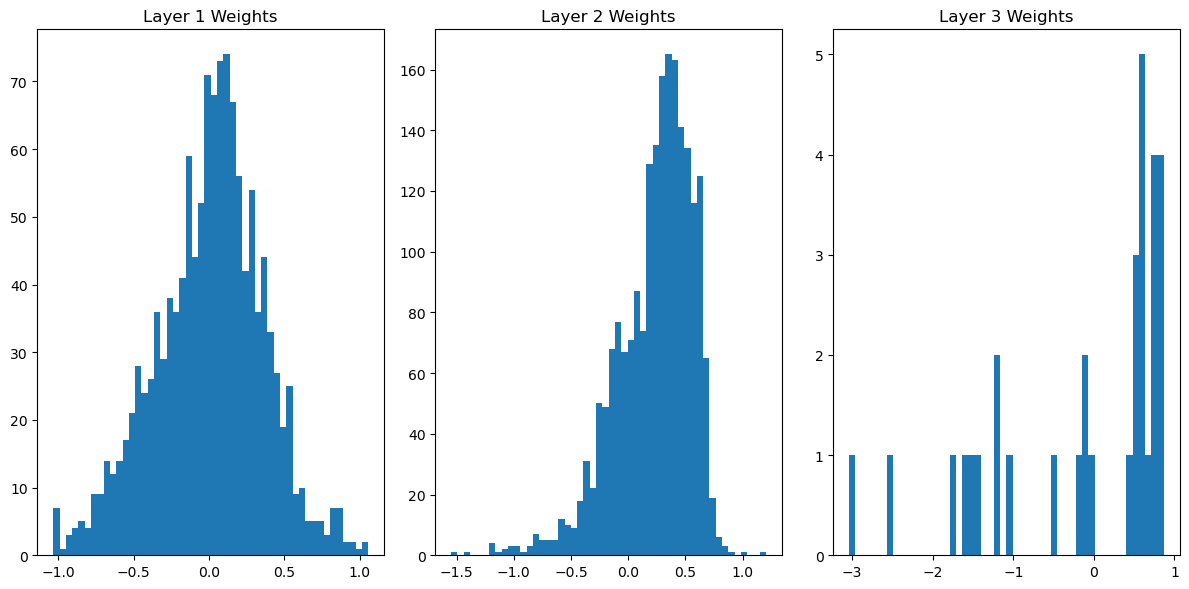

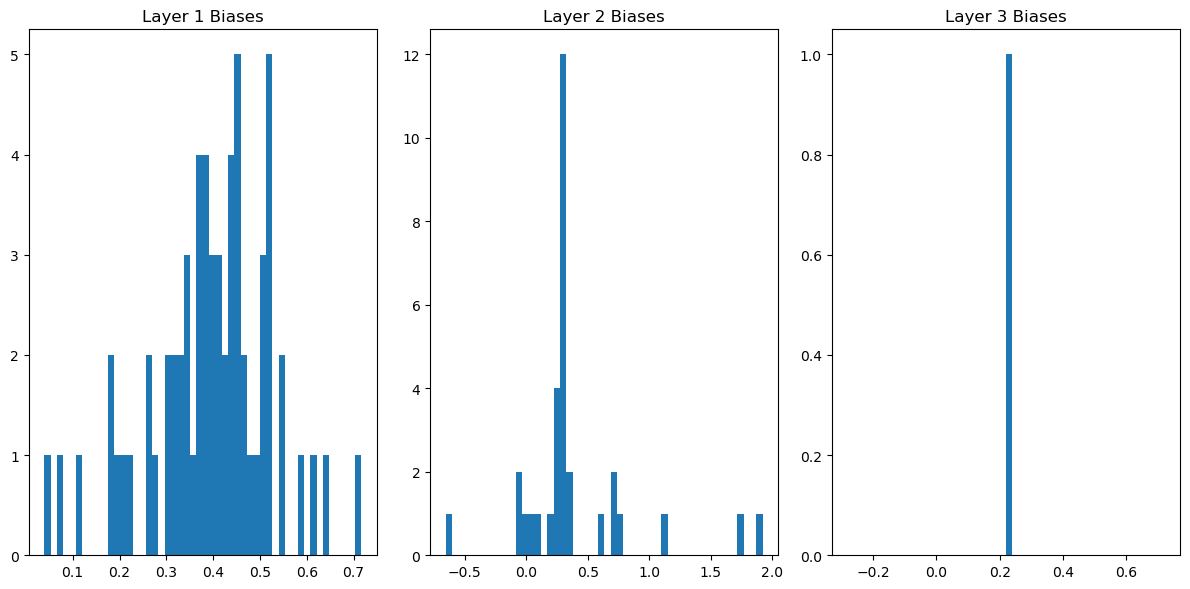

In [91]:
import matplotlib.pyplot as plt
import numpy as np

# Get the weights and biases of the model
weights = [layer.get_weights()[0] for layer in model.layers if len(layer.get_weights()) > 0]
biases = [layer.get_weights()[1] for layer in model.layers if len(layer.get_weights()) > 1]

# Visualize the weights
plt.figure(figsize=(12, 6))

# For each layer's weights, create a subplot
for i, weight in enumerate(weights):
    plt.subplot(1, len(weights), i+1)
    plt.hist(weight.flatten(), bins=50)
    plt.title(f'Layer {i+1} Weights')

plt.tight_layout()
plt.show()

# Visualize the biases
plt.figure(figsize=(12, 6))

# For each layer's biases, create a subplot
for i, bias in enumerate(biases):
    plt.subplot(1, len(biases), i+1)
    plt.hist(bias.flatten(), bins=50)
    plt.title(f'Layer {i+1} Biases')

plt.tight_layout()
plt.show()


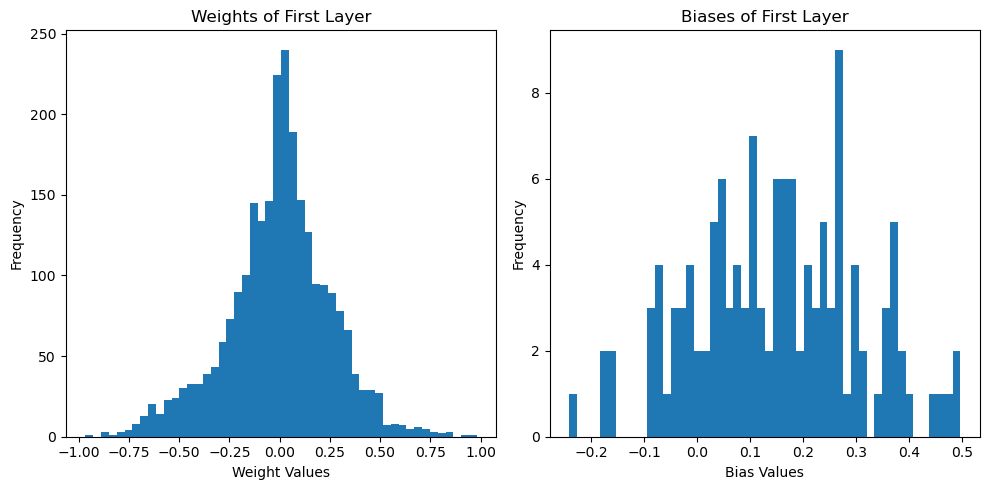

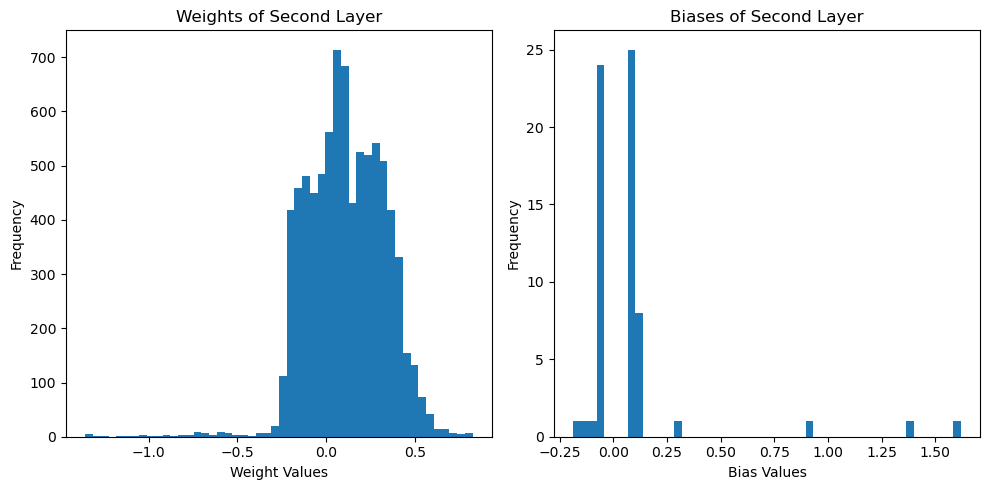

In [93]:
import matplotlib.pyplot as plt
import numpy as np

# Get the weights and biases of the trained model
weights = best_model.get_weights()

# Visualize the weights of the first Dense layer
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Weights of First Layer")
plt.hist(weights[0].flatten(), bins=50)  # weights[0] is the weight matrix of the first layer
plt.xlabel('Weight Values')
plt.ylabel('Frequency')

# Visualize the biases of the first Dense layer
plt.subplot(1, 2, 2)
plt.title("Biases of First Layer")
plt.hist(weights[1].flatten(), bins=50)  # weights[1] is the bias vector of the first layer
plt.xlabel('Bias Values')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Visualize the weights of the second Dense layer
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Weights of Second Layer")
plt.hist(weights[2].flatten(), bins=50)  # weights[2] is the weight matrix of the second layer
plt.xlabel('Weight Values')
plt.ylabel('Frequency')

# Visualize the biases of the second Dense layer
plt.subplot(1, 2, 2)
plt.title("Biases of Second Layer")
plt.hist(weights[3].flatten(), bins=50)  # weights[3] is the bias vector of the second layer
plt.xlabel('Bias Values')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()
